In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json, csv
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


import matplotlib.pyplot as plt
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [2]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/domain1_train.json', 'r') as file:
   domain1_data = [json.loads(line) for line in file]

with open('C:/Users/agkat/Documents/College/1. SML/A1/domain2_train.json', 'r') as file:
    domain2_data = [json.loads(line) for line in file]


# Split data into Testing and Validation sets

In [3]:
# Separate the text and labels
X1 = pad_sequences([instance['text'] for instance in domain1_data], padding='post', value=0, maxlen=1075)
Y1 = [instance['label'] for instance in domain1_data]

X2 = pad_sequences([instance['text'] for instance in domain2_data], padding='post', value=0, maxlen=1075)
Y2 = [instance['label'] for instance in domain2_data]

In [4]:
# Split the data into training and validation sets
TrainX1, ValX1, TrainY1, ValY1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)
TrainX2, ValX2, TrainY2, ValY2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [6]:
np.array(TrainX1)

array([[ 126,    1,  199, ...,    0,    0,    0],
       [   0,    0,    3, ...,    0,    0,    0],
       [   2, 1212,  818, ...,    0,    0,    0],
       ...,
       [   0,  833,    0, ...,    0,    0,    0],
       [  58, 1111,    4, ...,    0,    0,    0],
       [   2,   48,  124, ...,    0,    0,    0]])

## Nearest Neighbours are Edited here

In [58]:
c = [TrainY2]
for n in range(1, 10):
    enn = EditedNearestNeighbours(n_neighbors=n, sampling_strategy='majority')
    X_train_enn, y_train_enn = enn.fit_resample(TrainX2, TrainY2)
    c.append(y_train_enn)
    


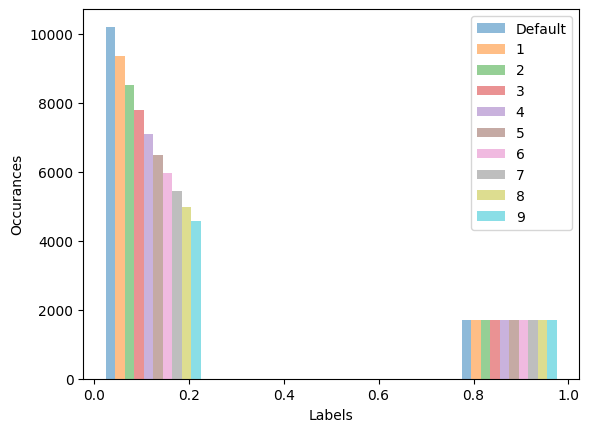

In [59]:
# c.append(TrainY2)
plt.hist(c, np.linspace(0, 1, 5), alpha=0.5, label=['Default',1,2,3,4,5,6,7,8,9,10,'Default'], )
#plt.hist(, np.linspace(0, 1, 4), alpha=0.5, label='Default')
plt.xlabel('Labels')
plt.ylabel('Occurances')
plt.legend()
plt.show()


## Training sets 

### Domain 1
- TrainX1 
- TrainY1

### Domain 2
- X_train_enn
- y_train_enn

## Validation sets

### Domain 1
- ValX1
- ValY1

### Domain 2
- ValX2
- ValY2